<a href="https://colab.research.google.com/github/hanzala0093/A-Hypothesis-Driven-Study/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [11]:
!pip install opendatasets

In [14]:
import opendatasets as od

In [15]:
od.download("https://www.kaggle.com/datasets/gauravpathak1789/yellow-tripdata-2020-01")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Muhammad Hanzala1122
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gauravpathak1789/yellow-tripdata-2020-01


In [16]:
taxi_data = pd.read_csv("/content/yellow-tripdata-2020-01/yellow_tripdata_2020-01 (1).csv")

In [17]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [18]:
taxi_data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


In [19]:
# rows and columns of the dataset
taxi_data.shape

(6405008, 18)

In [20]:
# Calculating duration from the pickup and dropoff datetime in minutes

# converting pickup and dropoff to datetime
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'])

# subtracting the pickup time from dropoff time to get duration
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']

# converting into minutes
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [21]:
# datatypes of the data
taxi_data.dtypes

,0
VendorID,float64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,float64


In [22]:
# removing unwanted columns
taxi_data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [23]:
# filtered data with relevant columns essential for the analysis
taxi_data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [24]:
# check for missing values
taxi_data.isnull().sum()

,0
passenger_count,65441
trip_distance,0
payment_type,65441
fare_amount,0
duration,0


In [25]:
# percentage of missing data to the total record of the data
print('Missing data %',round(65441/taxi_data.shape[0]*100,2))

Missing data % 1.02


In [26]:
# as the data has only 1% of data missing, we can simply drop the records with missing values.
taxi_data.dropna(inplace = True)

In [27]:
# changing the passenger count and payment type data type to integer as they are present in float
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [28]:
# check for the duplicate rows
taxi_data[taxi_data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [29]:
# removing duplicate rows as they will not contribute in analysis
taxi_data.drop_duplicates(inplace = True)

In [30]:
# after removing missing values and duplicate rows, now we have this much records left
taxi_data.shape

(3007861, 5)

In [31]:
# passenger count distribution
taxi_data['passenger_count'].value_counts(normalize = True)

,proportion
passenger_count,
1,0.581981
2,0.190350
3,0.066360
5,0.062937
6,0.039272
4,0.036046
0,0.023033
7,0.000009
9,0.000006


In [32]:
# payment type distribution
taxi_data['payment_type'].value_counts()

,count
payment_type,
1,2040133
2,925137
3,26233
4,16357
5,1


In [33]:
# filtering for payment type 1 and 2
taxi_data = taxi_data[taxi_data['payment_type']<3]

# filtering for passenger count from 1 to 2
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]

In [34]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
taxi_data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [35]:
# descriptive statistics for data
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [36]:
# filtering the records for only positive values
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]

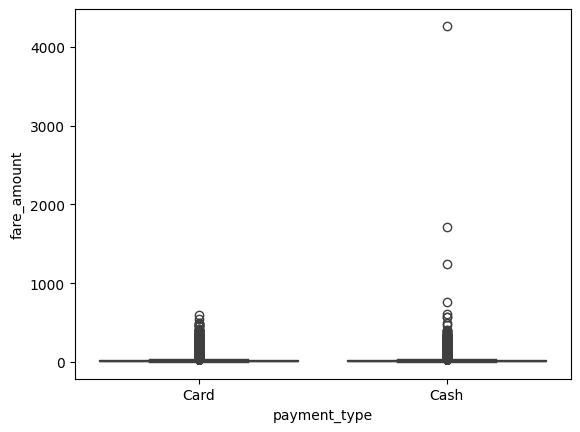

In [37]:
# check for the outliers
sns.boxplot(data=taxi_data, y="fare_amount", x="payment_type")
plt.show()

In [38]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_data[col].quantile(0.25)
    Q3 = taxi_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    taxi_data = taxi_data[(taxi_data[col] >= lower_bound) & (taxi_data[col] <= upper_bound)]


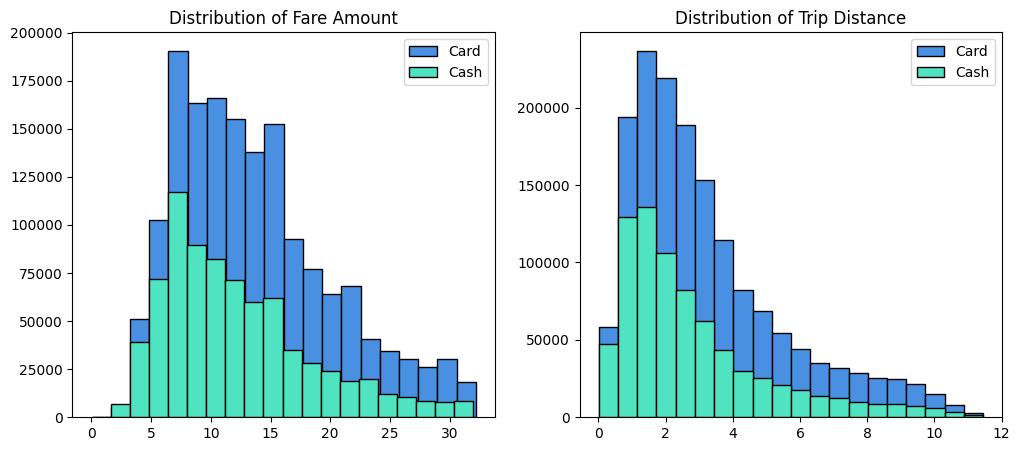

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#4A90E2', label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#50E3C2',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#4A90E2',label = 'Card')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#50E3C2',label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type
taxi_data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

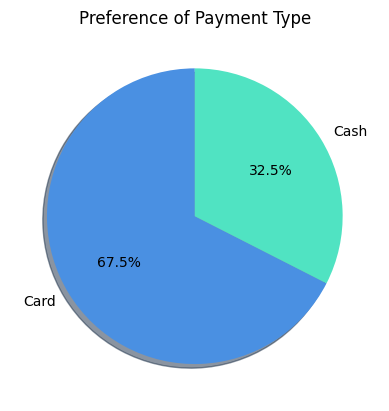

In [42]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize = True), labels = taxi_data['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#4A90E2','#50E3C2'])
plt.show()

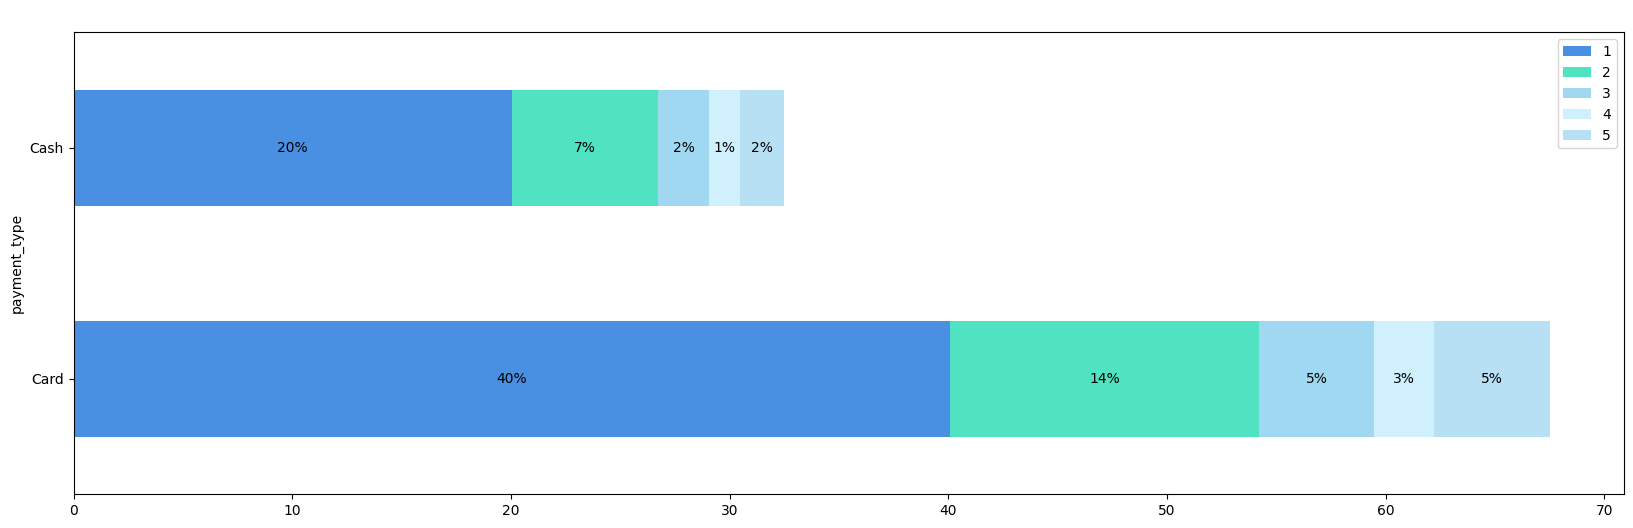

In [44]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#4A90E2', '#50E3C2', '#A0D8F1', '#D0F0FD', '#B8E0F5']
 )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

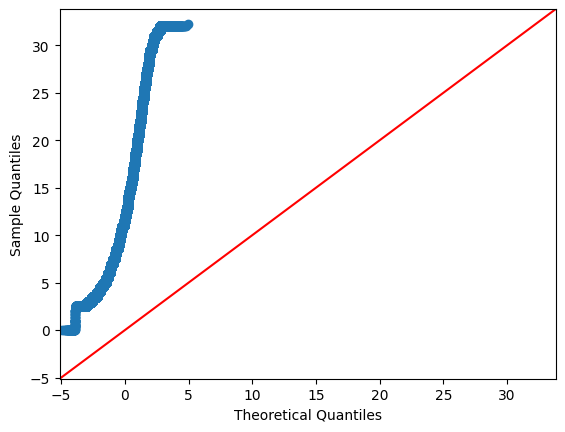

In [45]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(taxi_data['fare_amount'], line='45')
plt.show()

In [46]:
# sample 1
credit_card = taxi_data[taxi_data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = taxi_data[taxi_data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 165.59915491544626, P-value: 0.0

Reject the null hypothesis
